In [0]:
import os
import re
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow

 
import matplotlib.pyplot as plt
 
import tensorflow as tf
 
from keras.models import load_model
from keras.preprocessing import image
 
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

img = []
image_path="/content/drive/My Drive/kaggle/cancer/train/HAM10000_images_part_2/ISIC_0029310.jpg"
img = cv2.imread(image_path)       
print(img.shape)
imCopy = img.copy()
imgOut = cv2.resize(imCopy,(135,180))
print(imgOut.shape)
cv2_imshow(imgOut)
#status = cv2.imwrite('drive/My Drive/imgOut/processed{:>02}.png'.format(), imgOut)
#            i += 1


#IMG_SIZE = 180 

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haggishm","key":"304163c8690c1a17665877cc38155e81"}'}

In [9]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [10]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p /content/drive/My\ Drive/kaggle/cancer


100% 5.19G/5.20G [00:55<00:00, 84.4MB/s]
100% 5.20G/5.20G [00:55<00:00, 101MB/s] 


In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle/cancer')  #change dir
#!mkdir train  #create a directory named train/
#!mkdir test  #create a directory named test/
!unzip -q skin-cancer-mnist-ham10000.zip   #unzip data in train/
#!unzip -q test.zip -d test/  #unzip data in test/
#!unzip sample_submission.csv.zip
#!unzip train_labels.csv.zip

In [18]:
# Skin Cancer Dataset Preprocessing

# Import the libraries
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
import shutil

# Create a new directory for the images
base_dir = 'base_dir'
#os.mkdir(base_dir)

# Training file directory
train_dir = os.path.join(base_dir, 'train_dir')
#os.mkdir(train_dir)

# Validation file directory
val_dir = os.path.join(base_dir, 'val_dir')
#os.mkdir(val_dir)

# Create new folders in the training directory for each of the classes
nv = os.path.join(train_dir, 'nv')
#os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
#os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
#os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
#os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
#os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
#os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
#os.mkdir(df)

# Create new folders in the validation directory for each of the classes
nv = os.path.join(val_dir, 'nv')
#os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
#os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
#os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
#os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
#os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
#os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
#os.mkdir(df)

# Read the metadata
df = pd.read_csv('/content/drive/My Drive/kaggle/cancer/base_dir/HAM10000_metadata.csv')

# Display some information in the dataset
df.head()

# Set y as the labels
y = df['dx']

# Split the metadata into training and validation
df_train, df_val = train_test_split(df, test_size=0.1, random_state=101, stratify=y)

# Print the shape of the training and validation split
print(df_train.shape)
print(df_val.shape)

# Find the number of values in the training and validation set
df_train['dx'].value_counts()
df_val['dx'].value_counts()

# Transfer the images into folders
# Set the image id as the index
df.set_index('image_id', inplace=True)

# Get a list of images in each of the two folders
folder_1 = os.listdir('/content/drive/My Drive/kaggle/cancer/base_dir/ham10000_images_part_1')
folder_2 = os.listdir('/content/drive/My Drive/kaggle/cancer/base_dir/ham10000_images_part_2')

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

# Transfer the training images
for image in train_list:

    fname = image + '.jpg'
    label = df.loc[image, 'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join('/content/drive/My Drive/kaggle/cancer/base_dir/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('/content/drive/My Drive/kaggle/cancer/base_dir/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

# Transfer the validation images
for image in val_list:

    fname = image + '.jpg'
    label = df.loc[image, 'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join('/content/drive/My Drive/kaggle/cancer/base_dir/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('/content/drive/My Drive/kaggle/cancer/base_dir/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

# Check how many training images are in each folder
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

# Check how many validation images are in each folder
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

# Augment the data
# Class 'nv' is not going to be augmented
class_list = ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

for item in class_list:

    # Create a temporary directory for the augmented images
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    # Create a directory within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # List all the images in the directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
        # source path to image
        src = os.path.join('base_dir/train_dir/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator to augment the images in real time
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        # brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 6000  # total number of images we want to have in each class
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

# Check how many train images are each folder (original + augmented)
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

# Check how many validation images are in each folder
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

(9013, 7)
(1002, 7)
6034
1002
989
463
294
128
103
671
111
110
51
33
14
12
Found 1002 images belonging to 1 classes.
Found 989 images belonging to 1 classes.
Found 463 images belonging to 1 classes.
Found 294 images belonging to 1 classes.
Found 128 images belonging to 1 classes.
Found 103 images belonging to 1 classes.
6034
5810
5984
5606
5930
5170
4170
671
111
110
51
33
14
12






Found 38704 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 0s 0us/step


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
____________________________________________________________

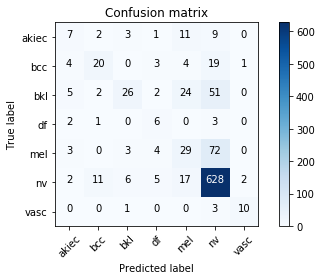

In [19]:
# The model for the skin cancer classifier

# Import the libraries
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Check if GPU is available
K.tensorflow_backend._get_available_gpus()

# The paths for the training and validation images
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

# Declare a few useful values
num_train_samples = 9013
num_val_samples = 1002
train_batch_size = 10
val_batch_size = 10
image_size = 224

# Declare how many steps are needed in an iteration
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

# Set up generators
train_batches = ImageDataGenerator(
    preprocessing_function= \
        keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=train_batch_size)

valid_batches = ImageDataGenerator(
    preprocessing_function= \
        keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path,
    target_size=(image_size, image_size),
    batch_size=val_batch_size)

test_batches = ImageDataGenerator(
    preprocessing_function= \
        keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path,
    target_size=(image_size, image_size),
    batch_size=val_batch_size,
    shuffle=False)

# Create a MobileNet model
mobile = keras.applications.mobilenet.MobileNet()

# See a summary of the layers in the model
mobile.summary()

# Modify the model
# Exclude the last 5 layers of the model
x = mobile.layers[-6].output
# Add a dropout and dense layer for predictions
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

# Create a new model with the new outputs
model = Model(inputs=mobile.input, outputs=predictions)

# See a summary of the new layers in the model
model.summary()

# Freeze the weights of the layers that we aren't training (training the last 23)
for layer in model.layers[:-23]:
    layer.trainable = False

# Train the model
# Define Top2 and Top3 Accuracy
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

# Compile the model
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

# Add weights to make the model more sensitive to melanoma
class_weights={
    0: 1.0,  # akiec
    1: 1.0,  # bcc
    2: 1.0,  # bkl
    3: 1.0,  # df
    4: 3.0,  # mel
    5: 1.0,  # nv
    6: 1.0,  # vasc
}

# Declare the filepath for the saved model
filepath = "model.h5"

# Declare a checkpoint to save the best version of the model
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1,
                             save_best_only=True, mode='max')

# Reduce the learning rate as the learning stagnates
reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

callbacks_list = [checkpoint, reduce_lr]

# Fit the model
history = model.fit_generator(train_batches,
                              steps_per_epoch=train_steps,
                              class_weight=class_weights,
                              validation_data=valid_batches,
                              validation_steps=val_steps,
                              epochs=30,
                              verbose=1,
                              callbacks=callbacks_list)

# Evaluate the model
# Evaluation of the last epoch
val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, steps=val_steps)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

# Evaluation of the best epoch
model.load_weights('model.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, steps=val_steps)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

# Create a confusion matrix of the test images
test_labels = test_batches.classes

# Make predictions
predictions = model.predict_generator(test_batches, steps=val_steps, verbose=1)

# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels)